In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np

import os
from glob import glob

import IPython.display as display

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
train_filenames = glob('/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/*.tfrec')
train_filenames

['/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/00-224x224-798.tfrec',
 '/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/01-224x224-798.tfrec',
 '/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/04-224x224-798.tfrec',
 '/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/03-224x224-798.tfrec',
 '/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/02-224x224-798.tfrec',
 '/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/05-224x224-798.tfrec',
 '/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/06-224x224-798.tfrec',
 '/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/07-224x224-798.tfrec',
 '/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/08-224x224-798.tfrec',
 

In [4]:
# 데이터 종류 확인
train_dataset = tf.data.TFRecordDataset(train_filenames)
for raw_record in train_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

features {
  feature {
    key: "class"
    value {
      int64_list {
        value: 57
      }
    }
  }
  feature {
    key: "id"
    value {
      bytes_list {
        value: "338ab7bac"
      }
    }
  }
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\001\001,\001,\000\000\377\333\000C\000\002\001\001\001\001\001\002\001\001\001\002\002\002\002\002\004\003\002\002\002\002\005\004\004\003\004\006\005\006\006\006\005\006\006\006\007\t\010\006\007\t\007\006\006\010\013\010\t\n\n\n\n\n\006\010\013\014\013\n\014\t\n\n\n\377\333\000C\001\002\002\002\002\002\002\005\003\003\005\n\007\006\007\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\377\300\000\021\010\000\340\000\340\003\001\021\000\002\021\001\003\021\001\377\304\000\035\000\000\002\003\001\001\001\001\001\000\000\000\000\000\000\000\000\005\006\004\007\010\003\002\001\t\000\377\304\000A\020\000\001\003\003\003

In [5]:
image_feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'class': tf.io.FixedLenFeature([], tf.int64),
    'id': tf.io.FixedLenFeature([], tf.string)
}

label = 57
id= b'338ab7bac'


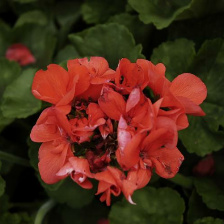

label = 10
id= b'90ffc5d69'


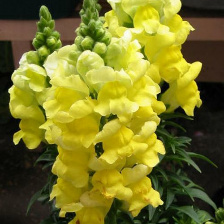

label = 82
id= b'76feda65b'


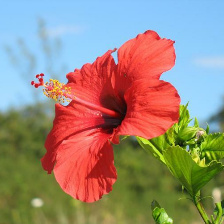

label = 102
id= b'416755ace'


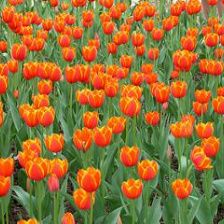

label = 94
id= b'4b067b390'


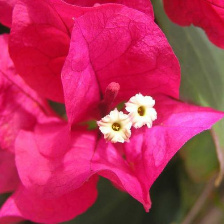

In [6]:
# 데이터 5개 확인해보기
for raw_record in train_dataset.take(5):
    parsed_image_data = tf.io.parse_single_example(raw_record, image_feature_description)
    image = parsed_image_data['image'].numpy()
    label = parsed_image_data['class']
    id = parsed_image_data['id']
    print(f'label = {label}\nid= {id}')
    display.display(display.Image(data=image))

In [7]:
# 데이터셋 만들기

# train 파일 읽어오기
def _parse_train_image_function(example_proto):
    ds = tf.io.parse_single_example(example_proto, image_feature_description)
    img = tf.image.decode_image(ds['image'])
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.reshape(img, (224, 224, 3))
    label = tf.cast(ds['class'], dtype=tf.int32)
    return img, label

# test 파일 읽어오기
def _parse_test_image_function(example_proto):
    ds = tf.io.parse_single_example(example_proto, image_feature_description)
    img = tf.image.decode_image(ds['image'])
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.reshape(img, (224, 224, 3))
    return img


def create_dataset(tfrecord_files, batch_size, flag=True):
    ds = tf.data.TFRecordDataset(filenames=tfrecord_files)
    if flag: # train or valid 
        ds = ds.map(_parse_train_image_function).prefetch(AUTOTUNE)
        ds = ds.shuffle(2020)
    else:
        ds = ds.map(_parse_test_image_function).prefetch(AUTOTUNE)
    
    ds = ds.batch(batch_size)
    return ds

In [8]:
train_filenames = glob('/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/train/*.tfrec')
valid_filenames = glob('/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/val/*.tfrec')
test_filenames = glob('/content/drive/MyDrive/github/딥러닝/TensorFlow/file type/Petals to the Metal/test/*.tfrec')

train_ds = create_dataset(train_filenames, 128)
valid_ds = create_dataset(valid_filenames, 32)
test_ds = create_dataset(test_filenames, 32, False)

# dataset 출력
print(f'train_ds = {train_ds}')
print(f'val_ds = {valid_ds}')
print(f'test_ds = {test_ds}')

train_ds = <BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>
val_ds = <BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>
test_ds = <BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>


In [9]:
labels = np.empty(shape=(0,))
for train_data in train_ds:
    for label in train_data[1]:
        labels = np.append(labels, label)

num_of_class = len(np.unique(labels))

In [10]:
# modeling
transfer = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
transfer.trainable = False

model = tf.keras.models.Sequential([
                                    transfer,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(104, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 104)               3

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [12]:
checkpoint_path = 'tfr_checkpoint.ckpt'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                monitor='val_loss', 
                                                verbose=1)

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                               factor=0.5, 
                                               patience=3,
                                               verbose=1)

In [13]:
model.fit(train_ds,
          validation_data=(valid_ds),
          epochs=20,
          callbacks = [checkpoint, reduceLR])

Epoch 1/20
100/100 [==============================] - 115s 912ms/step - loss: 4.4678 - acc: 0.1530 - val_loss: 3.7188 - val_acc: 0.2543

Epoch 00001: val_loss improved from inf to 3.71879, saving model to tfr_checkpoint.ckpt
Epoch 2/20
100/100 [==============================] - 75s 732ms/step - loss: 3.4428 - acc: 0.3041 - val_loss: 3.1890 - val_acc: 0.3381

Epoch 00002: val_loss improved from 3.71879 to 3.18900, saving model to tfr_checkpoint.ckpt
Epoch 3/20
100/100 [==============================] - 74s 730ms/step - loss: 3.0728 - acc: 0.3790 - val_loss: 2.9332 - val_acc: 0.4084

Epoch 00003: val_loss improved from 3.18900 to 2.93322, saving model to tfr_checkpoint.ckpt
Epoch 4/20
100/100 [==============================] - 75s 731ms/step - loss: 2.8357 - acc: 0.4329 - val_loss: 2.8217 - val_acc: 0.4475

Epoch 00004: val_loss improved from 2.93322 to 2.82170, saving model to tfr_checkpoint.ckpt
Epoch 5/20
100/100 [==============================] - 75s 732ms/step - loss: 2.7345 - acc: 